Perform the following operations using R/Python on the data sets:



*   a) Compute and display summary statistics for each feature available in the dataset. (e.g.
minimum value, maximum value, mean, range, standard deviation, variance and percentiles
*   b) Data Visualization-Create a histogram for each feature in the dataset to illustrate the
feature distributions.








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = pd.read_csv('/content/heart.csv')

a) Compute and display summary statistics for each feature available in the dataset. (e.g. minimum value, maximum value, mean, range, standard deviation, variance and percentiles

In [3]:
ds.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
ds['cp'].unique()

array([0, 1, 2, 3])

In [5]:
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


b) Data Visualization-Create a histogram for each feature in the dataset to illustrate the feature distributions.

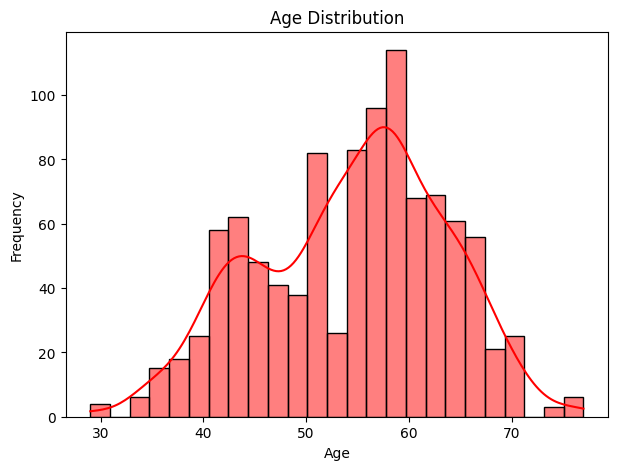

In [6]:
plt.figure(figsize=(7,5))
sns.histplot(data=ds, x='age', kde=True, bins=25, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


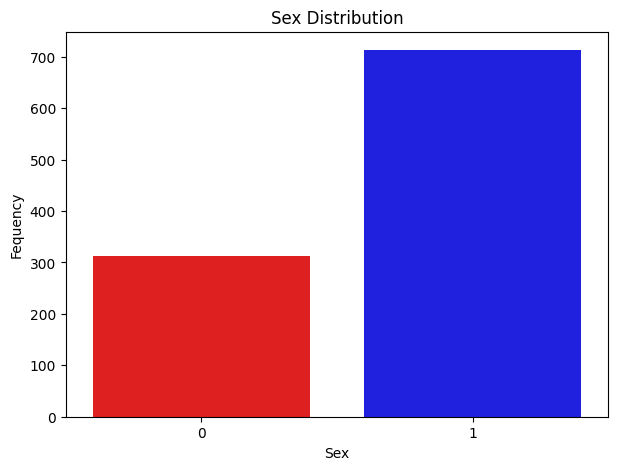

In [7]:
plt.figure(figsize=(7,5))
sns.countplot(x='sex',data=ds,palette=['red','blue'])
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Fequency')
ds['sex'] = ds['sex'].map({0: 'Female', 1: 'Male'}) # Changed plt.ds to ds
plt.show()

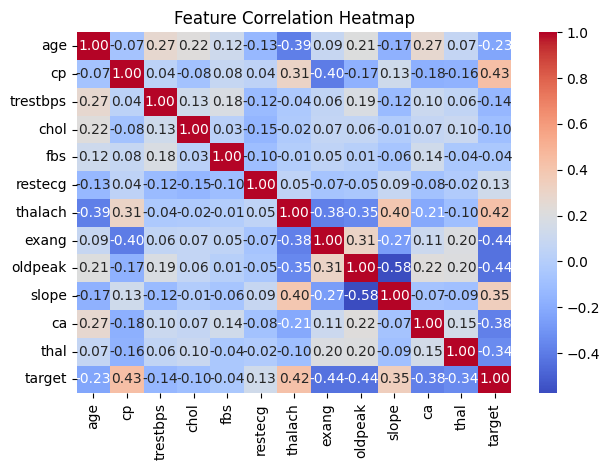

In [8]:
# Correlation heatmap
sns.heatmap(ds.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")

plt.tight_layout()
plt.show()

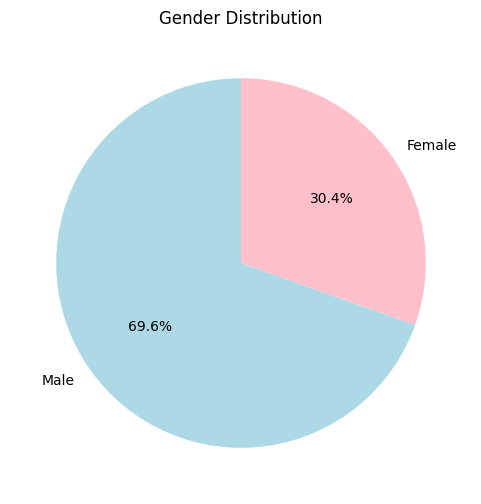

In [9]:
plt.figure(figsize=(6, 6))

# Pie chart for gender distribution
ds["sex"].value_counts().plot.pie(labels=["Male", "Female"],
                                  colors=["lightblue", "pink"],
                                  autopct="%1.1f%%", startangle=90)

plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

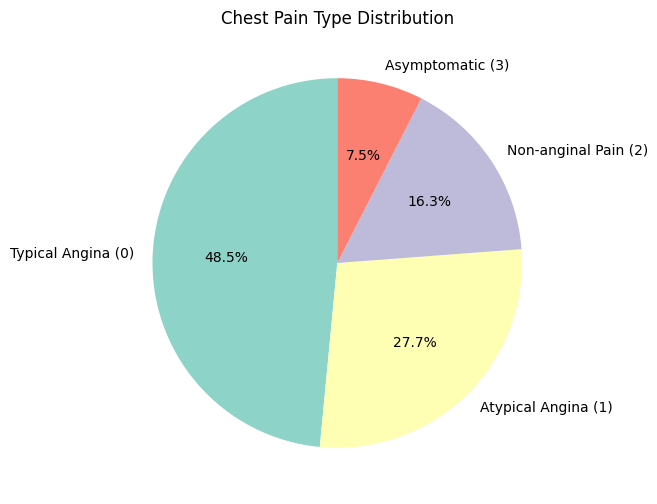

In [10]:
plt.figure(figsize=(6, 6))

# Pie chart for Chest Pain Type (cp) distribution
cp_counts = ds["cp"].value_counts()
plt.pie(cp_counts, labels=["Typical Angina (0)", "Atypical Angina (1)", "Non-anginal Pain (2)", "Asymptomatic (3)"],
        autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set3", 4))

plt.title("Chest Pain Type Distribution")
plt.show()

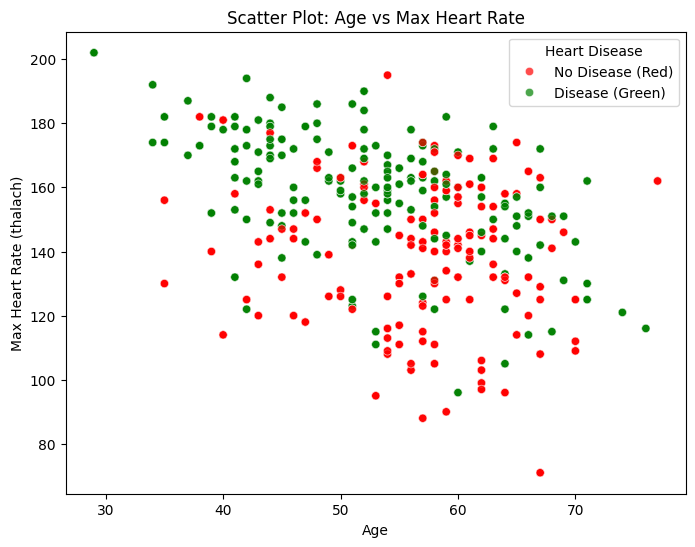

In [11]:
plt.figure(figsize=(8, 6))


colors = {0: "red", 1: "green"}

sns.scatterplot(x=ds["age"], y=ds["thalach"], hue=ds["target"], palette=colors, alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.title("Scatter Plot: Age vs Max Heart Rate")

legend_labels = ["No Disease (Red)", "Disease (Green)"]
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title="Heart Disease")

plt.show()

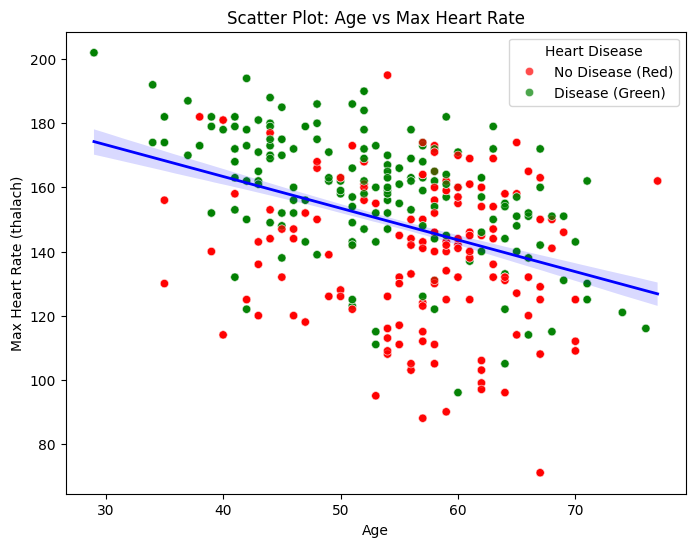

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))


colors = {0: "red", 1: "green"}

sns.scatterplot(x=ds["age"], y=ds["thalach"], hue=ds["target"], palette=colors, alpha=0.7)

# Add trend line
sns.regplot(x=ds["age"], y=ds["thalach"], scatter=False, color="blue", line_kws={"linewidth": 2})

plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.title("Scatter Plot: Age vs Max Heart Rate")


legend_labels = ["No Disease (Red)", "Disease (Green)"]
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title="Heart Disease")

plt.show()


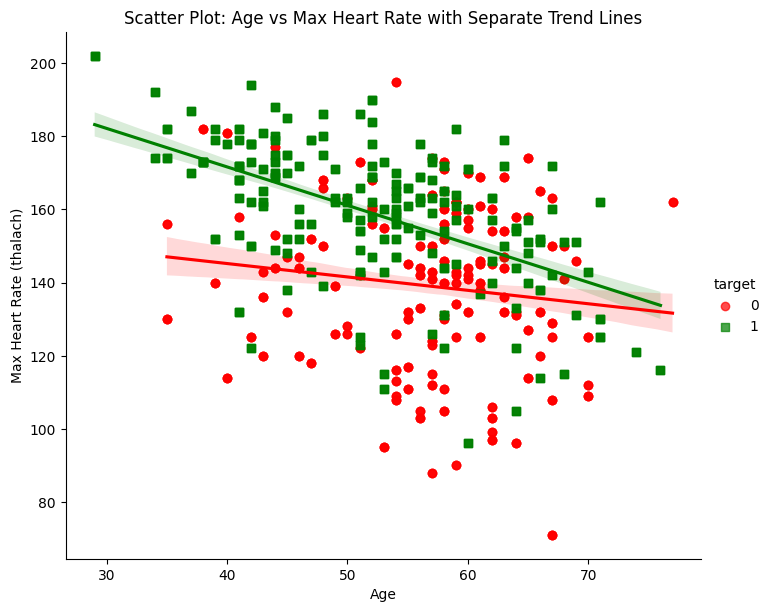

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


colors = {0: "red", 1: "green"}

# Cr
sns.lmplot(x="age", y="thalach", hue="target", data=ds, palette=colors,
           aspect=1.2, height=6, markers=["o", "s"], scatter_kws={'alpha':0.7})
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.title("Scatter Plot: Age vs Max Heart Rate with Separate Trend Lines")

plt.show()
